In [1]:
# WIRELESS CUSTOMER CHURN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

In [2]:
#load data
df = pd.read_csv('CreditRisk.csv')

In [3]:
#Check the data 
df.head()

,Credit_Hist,Gender,Employment,Marital status,Housing,Credit_Std
0,1,0,1,0,0,0
1,1,1,1,2,0,0
2,1,0,0,0,1,0
3,1,0,0,0,1,0
4,1,1,0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Credit_Hist     425 non-null    int64
 1   Gender          425 non-null    int64
 2   Employment      425 non-null    int64
 3   Marital status  425 non-null    int64
 4   Housing         425 non-null    int64
 5   Credit_Std      425 non-null    int64
dtypes: int64(6)
memory usage: 20.1 KB


In [ ]:
# Change text to integers data type.
# label_encoder = preprocessing.LabelEncoder()
# obj = (df.dtypes == 'object')
# for col in list(obj[obj].index):
#   df[col] = label_encoder.fit_transform(df[col])

# EDA

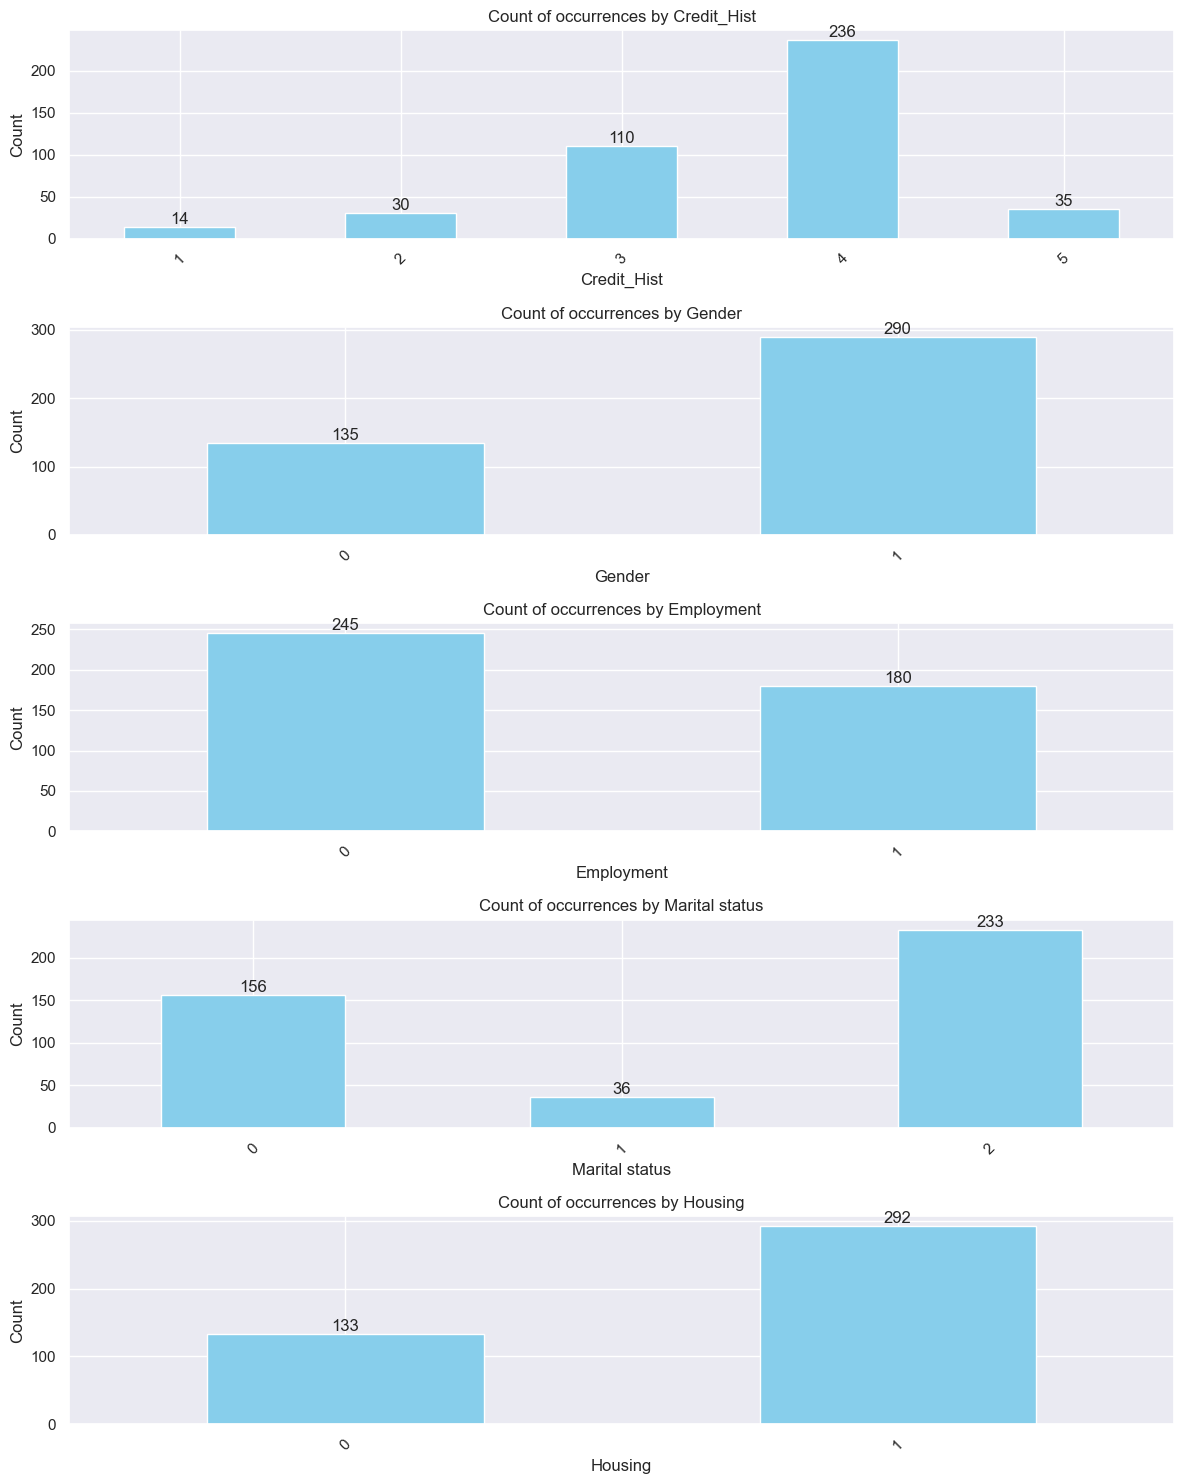

In [6]:
# List of columns to group by
group_by_columns = ['Credit_Hist', 'Gender', 'Employment', 'Marital status', 'Housing']

# Create subplots
fig, axes = plt.subplots(nrows=len(group_by_columns), ncols=1, figsize=(12, 15))

# Group data by each column individually and count occurrences
for idx, column in enumerate(group_by_columns):
    grouped_data = df.groupby([column]).size()
    
    # Plotting
    ax = grouped_data.plot(kind='bar', ax=axes[idx], color='skyblue')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'Count of occurrences by {column}')
    ax.set_xticklabels(grouped_data.index, rotation=45)
    
    # Annotate bars with count values
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height}', (x + width/2, y + height), ha='center', va='bottom')

plt.tight_layout()
plt.show()


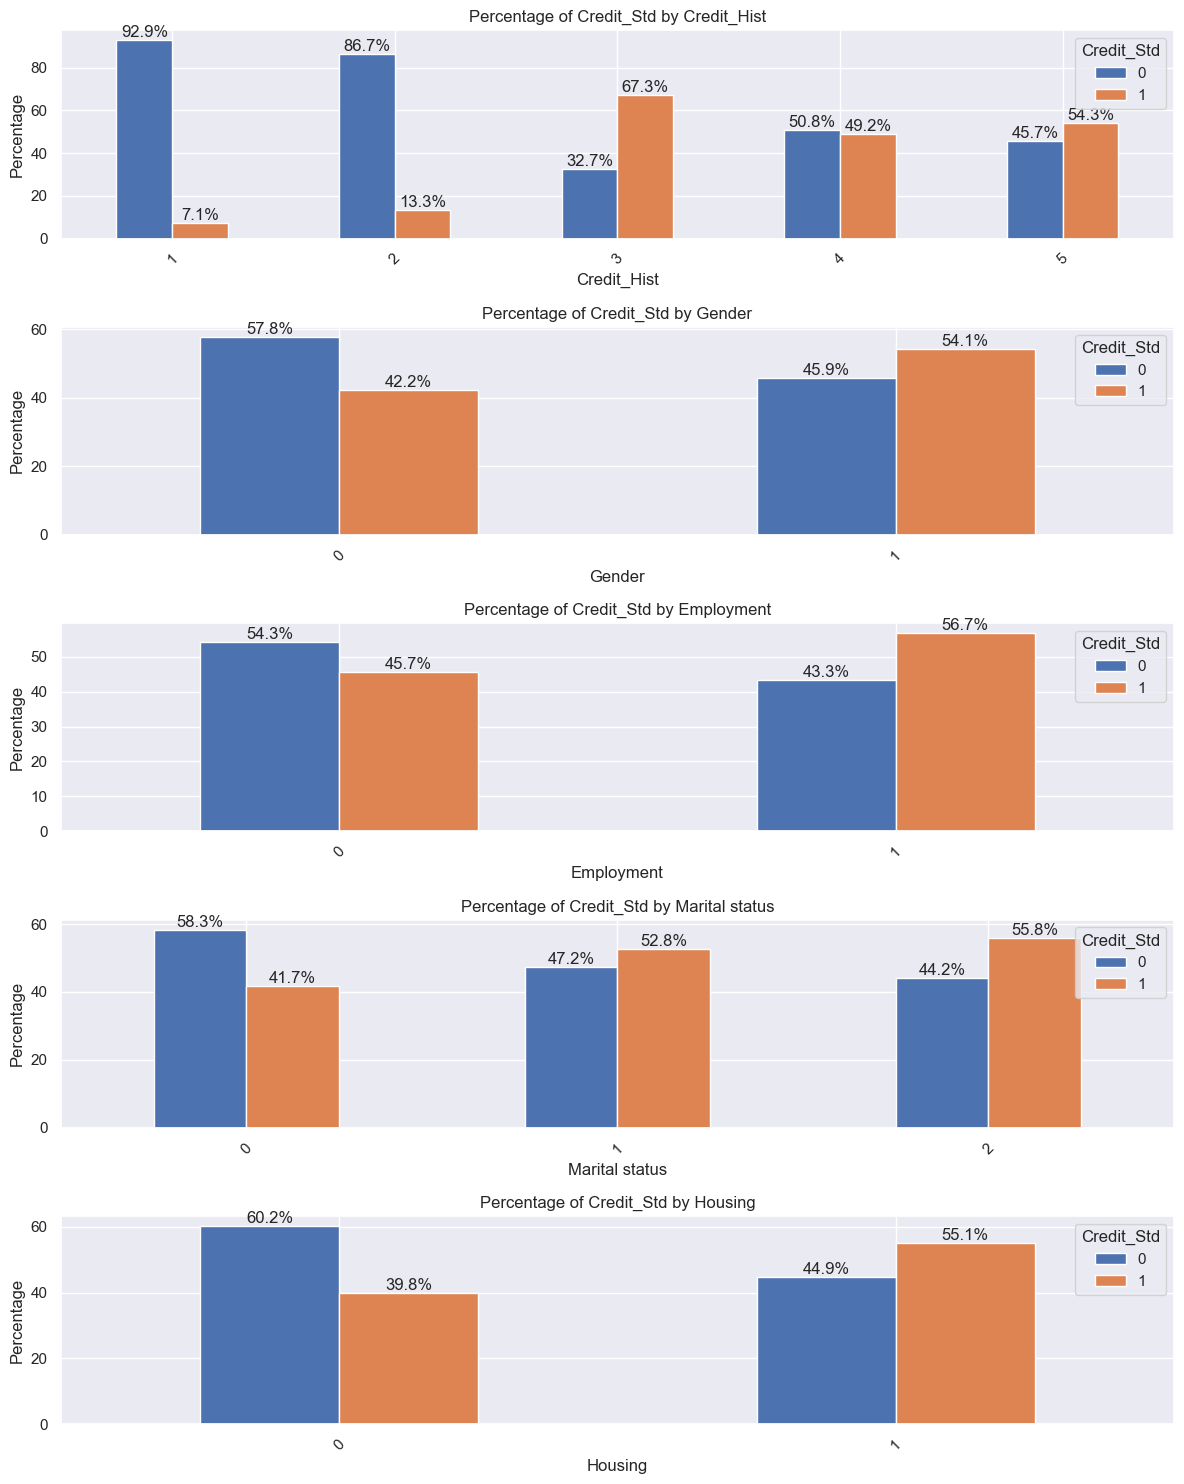

In [7]:
# Create subplots
fig, axes = plt.subplots(nrows=len(group_by_columns), ncols=1, figsize=(12, 15))

# Group data by each column individually and compute the mean of 'Credit_Std' for each group
for idx, column in enumerate(group_by_columns):
    grouped_data = df.groupby([column, 'Credit_Std']).size().unstack()
    totals = grouped_data.sum(axis=1)
    percentages = grouped_data.div(totals, axis=0) * 100
    
    # Plotting
    ax = percentages.plot(kind='bar', stacked=False, ax=axes[idx])
    ax.set_xlabel(column)
    ax.set_ylabel('Percentage')
    ax.set_title(f'Percentage of Credit_Std by {column}')
    ax.legend(title='Credit_Std', labels=['0', '1'])
    ax.set_xticklabels(grouped_data.index.get_level_values(0), rotation=45)
    
    # Annotate bars with percentage values
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.annotate(f'{height:.1f}%', (x + width/2, y + height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Logistic Regression Model

In [8]:
#Define x and y
y = df[['Credit_Std']]
x = df.drop(['Credit_Std'], axis = 1)

In [9]:
#split data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [10]:
##create the model with sklearn
model = LogisticRegression()
model.fit(x_train, y_train)


c:\Users\m.pham\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [13]:
# check the result for training
model.score(x_train, y_train)

0.5970588235294118

In [14]:
# check the result for testing
model.score(x_test, y_test)

0.5411764705882353

In [15]:
y_pred = model.predict(x_test)


In [16]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[23, 19],
       [20, 23]], dtype=int64)